# Visualization of Rho Data
This notebook is intended to take dat inputs in the cluster format which we have been using for deep sets (X, Y arrays) and plot the clusters. The intention is to use and develop a set of visualization tools to be used in conjunction with this notebook.

#### To Do:
- [ ] Conversion from Eta/Phi to x,y,z
- [ ] Include Tracks
- [ ] Plot lines to central point in cluster?
- [ ] Speed up to xyz and put it in visualization_tools script
- [ ] Do this: https://stackoverflow.com/questions/50149562/jupyterlab-interactive-plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import time as t
import matplotlib.ticker as ticker
# import ml_util as mlu

import sys
path = '/Work/EPE/ML4pi/'
sys.path.append(path)
import util.deep_set_util as dsu
from util.deep_set_util import to_xyz
from util.deep_set_util import cell_meta

## Load up Data Sets

In [6]:
t0 = t.time()
X = np.load('X_tracks_multipleClusters_med.npz')
Y = np.load('Y_tracks_multipleClusters_med.npz')
Xraw = X['arr_0'][:500000,:,:5]
Yraw = Y['arr_0'][:500000]
eta_mask = Xraw[:,:,1] != 0
phi_mask = Xraw[:,:,2] != 0
rPerp_mask = Xraw[:,:,3] != 0
cell_mask = np.logical_or(eta_mask, phi_mask, rPerp_mask)

### Histograms of Raw Data

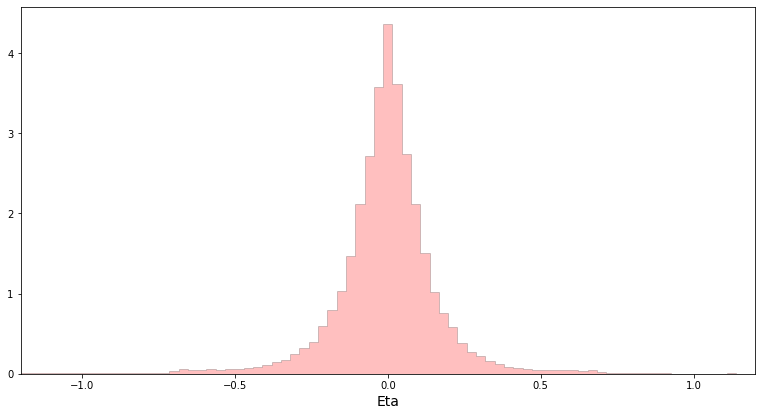

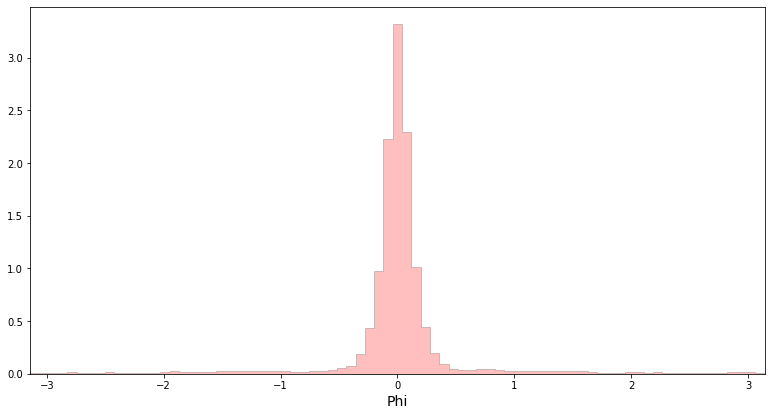

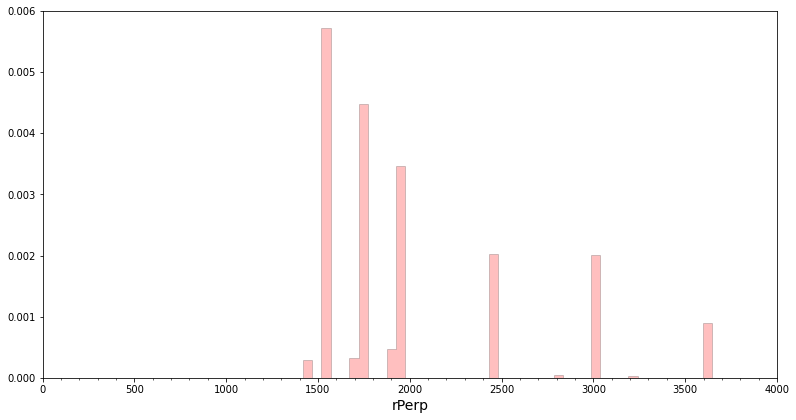

In [7]:
eta_bins = np.linspace(-1.2,1.2,80,endpoint=True)
phi_bins = np.linspace(-np.pi,np.pi,80,endpoint=True)
rPerp_bins = np.linspace(0,4000,80,endpoint=True)

# Eta histogram
fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_axes([.1,.1,.85,.85])

ax1.hist(Xraw[rPerp_mask,1], bins=eta_bins, color='red', alpha=.25, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='X', density=True)
ax1.set_xlim(np.min(eta_bins), np.max(eta_bins))
ax1.set_xlabel('Eta', fontsize=14)
plt.show()

# Phi histogram
fig2 = plt.figure(figsize=(12,6))
ax2 = fig2.add_axes([.1,.1,.85,.85])

ax2.hist(Xraw[rPerp_mask,2], bins=phi_bins, color='red', alpha=.25, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='X', density=True)
ax2.set_xlim(np.min(phi_bins), np.max(phi_bins))
ax2.set_xlabel('Phi', fontsize=14)
plt.show()

# rPerp histogram
fig3 = plt.figure(figsize=(12,6))
ax3 = fig3.add_axes([.1,.1,.85,.85])

ax3.hist(Xraw[rPerp_mask,3], bins=rPerp_bins, color='red', alpha=.25, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='X', density=True)
ax3.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax3.set_xlim(np.min(rPerp_bins), np.max(rPerp_bins))
ax3.set_xlabel('rPerp', fontsize=14)
plt.show()

### Convert [Eta, Phi, rPerp] to [X,Y,Z]

In [8]:
X = np.zeros(Xraw.shape)
Y = np.empty(Yraw.shape)
X[:,:,0] = np.ndarray.copy(Xraw[:,:,0])
Y = np.ndarray.copy(Yraw)

rPerp_mask = Xraw[:,:,3] != 0
print(rPerp_mask.shape)

# X[rPerp_mask,1:4] = np.ndarray.copy(Xraw[rPerp_mask,1:4])

for i in range(X.shape[0]):
    conv_mask = Xraw[i,:,3] != 0
    X[i,conv_mask,1:4] = to_xyz(np.ndarray.copy(Xraw[i,conv_mask,1:4]))

(3108, 825)


### Histograms of Cartesian

<Figure size 432x288 with 0 Axes>

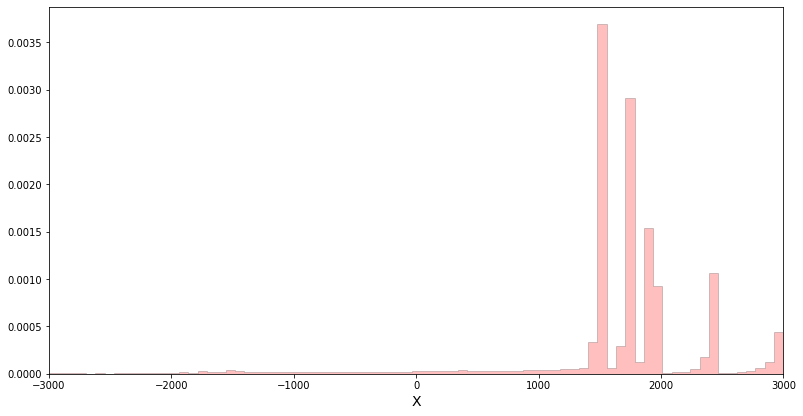

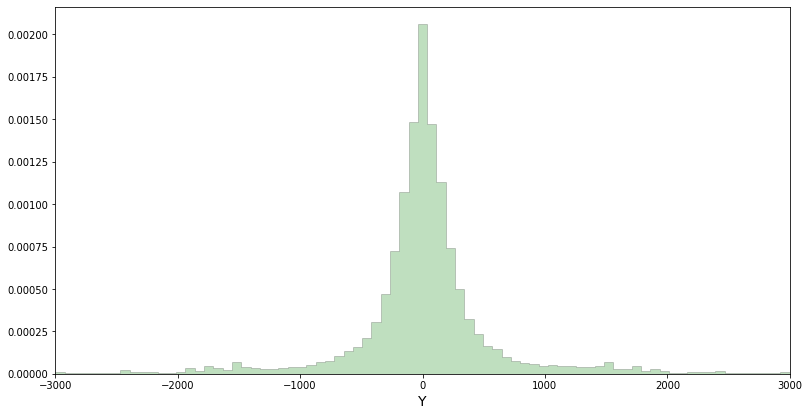

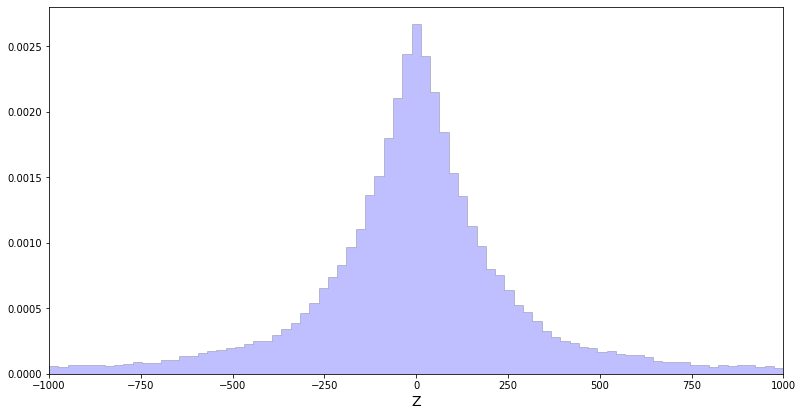

In [9]:
plt.cla();plt.clf()
xmask = X[:,:,1] != 0
ymask = X[:,:,2] != 0
zmask = np.logical_or(xmask, ymask)

xbins = np.linspace(-3000,3000,80,endpoint=True)
ybins = np.linspace(-3000,3000,80,endpoint=True)
zbins = np.linspace(-1000,1000,80,endpoint=True)

# X histogram
fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_axes([.1,.1,.85,.85])

ax1.hist(X[xmask,1], bins=xbins, color='red', alpha=.25, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='X', density=True)
ax1.set_xlim(np.min(xbins), np.max(xbins))
ax1.set_xlabel('X', fontsize=14)
plt.show()

# Y histogram
fig2 = plt.figure(figsize=(12,6))
ax2 = fig2.add_axes([.1,.1,.85,.85])

ax2.hist(X[ymask,2], bins=ybins, color='green', alpha=.25, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='Y', density=True)
ax2.set_xlim(np.min(ybins), np.max(ybins))
ax2.set_xlabel('Y', fontsize=14)
plt.show()

# Z histogram
fig3 = plt.figure(figsize=(12,6))
ax3 = fig3.add_axes([.1,.1,.85,.85])

ax3.hist(X[zmask,3], bins=zbins, color='blue', alpha=.25, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='Z', density=True)
ax3.set_xlim(np.min(zbins), np.max(zbins))
ax3.set_xlabel('Z', fontsize=14)
plt.show()

## Choose Events and Create Dataset

In [11]:
for i in range(len(Xraw)):
    num = np.count_nonzero(cell_mask[i,:])
    if num > 199:
        print(str(i)+': '+str(num))

1: 445
3: 380
5: 284
7: 362
9: 265
13: 544
14: 235
15: 215
20: 229
23: 221
27: 314
32: 400
36: 220
38: 333
44: 655
45: 329
56: 240
60: 394
63: 334
69: 245
72: 442
75: 200
79: 526
85: 284
86: 403
98: 239
102: 282
104: 223
106: 248
107: 242
108: 281
111: 299
112: 653
116: 392
117: 274
119: 371
120: 230
124: 465
127: 262
128: 310
130: 290
139: 302
145: 283
147: 259
149: 201
151: 246
152: 317
154: 403
161: 350
164: 258
166: 218
167: 220
171: 212
172: 361
179: 234
180: 285
181: 471
184: 278
186: 310
187: 214
190: 312
196: 412
201: 512
202: 526
203: 507
205: 221
206: 305
208: 451
212: 364
214: 201
216: 210
217: 332
218: 285
221: 431
227: 346
237: 343
241: 365
244: 487
246: 223
250: 367
253: 473
260: 302
261: 231
267: 346
271: 353
287: 287
288: 254
290: 233
296: 400
300: 491
303: 296
307: 342
317: 277
319: 203
322: 303
324: 216
328: 324
330: 275
332: 269
333: 507
334: 234
335: 504
339: 502
351: 205
354: 226
355: 227
356: 465
361: 331
363: 448
365: 245
367: 378
368: 211
369: 234
372: 543
379: 

In [64]:
visual_event = 25
points_mask = X[visual_event,:,0] != 0
point_positions = X[visual_event,points_mask,1:4]
print('Number in cluster Total: '+repr(np.count_nonzero(points_mask)))

Number in cluster Total: 145


#### Finding Centroids

In [91]:
emb1_mask = np.logical_and(Xraw[visual_event,:,3] > 1400, Xraw[visual_event,:,3] < 1600)
emb2_mask = np.logical_and(Xraw[visual_event,:,3] > 1600, Xraw[visual_event,:,3] < 1800)
emb3_mask = np.logical_and(Xraw[visual_event,:,3] > 1800, Xraw[visual_event,:,3] < 2200)
tilebar0_mask = np.logical_and(Xraw[visual_event,:,3] > 2200, Xraw[visual_event,:,3] < 2700)
tilebar1_mask = np.logical_and(Xraw[visual_event,:,3] > 2700, Xraw[visual_event,:,3] < 3300)
tilebar2_mask = np.logical_and(Xraw[visual_event,:,3] > 3300, Xraw[visual_event,:,3] < 3700)
emb1_mask.shape
img = Xraw[visual_event][emb1_mask]
img

array([[ 9.01333764e-02,  4.86572981e-02, -2.26544142e-02,
         1.53977783e+03,  0.00000000e+00],
       [ 4.60442193e-02,  5.17751575e-02, -2.26544142e-02,
         1.53977783e+03,  0.00000000e+00],
       [ 1.60578992e-02,  5.48929572e-02, -2.26544142e-02,
         1.53977783e+03,  0.00000000e+00],
       [ 1.10310223e-02,  6.42465949e-02, -2.26544142e-02,
         1.53977783e+03,  0.00000000e+00],
       [ 1.99412387e-02,  7.04824328e-02, -2.26544142e-02,
         1.53977783e+03,  0.00000000e+00],
       [ 8.01456906e-03,  7.36004114e-02, -2.26544142e-02,
         1.53977783e+03,  0.00000000e+00],
       [ 1.89654976e-02,  7.98363090e-02, -2.26544142e-02,
         1.53977783e+03,  0.00000000e+00],
       [ 1.99412387e-02,  8.60723257e-02, -2.26544142e-02,
         1.53977783e+03,  0.00000000e+00],
       [ 1.10310223e-02,  8.91903043e-02, -2.26544142e-02,
         1.53977783e+03,  0.00000000e+00],
       [ 2.69884337e-02,  2.37152576e-02, -2.26544142e-02,
         1.53977783e+03

In [73]:
emb1_mask = np.logical_and(Xraw[visual_event,:,3] > 1400, Xraw[visual_event,:,3] < 1600)
emb2_mask = np.logical_and(Xraw[visual_event,:,3] > 1600, Xraw[visual_event,:,3] < 1800)
emb3_mask = np.logical_and(Xraw[visual_event,:,3] > 1800, Xraw[visual_event,:,3] < 2200)
tilebar0_mask = np.logical_and(Xraw[visual_event,:,3] > 2200, Xraw[visual_event,:,3] < 2700)
tilebar1_mask = np.logical_and(Xraw[visual_event,:,3] > 2700, Xraw[visual_event,:,3] < 3300)
tilebar2_mask = np.logical_and(Xraw[visual_event,:,3] > 3300, Xraw[visual_event,:,3] < 3700)

In [48]:
def weighted_sum(variable, weights):
    ''' Discrete first moment. '''
    Ans = np.dot(weights, variable)
    Ans = Ans / np.sum(weights)
    return Ans

def find_centroid(coords_3d, targets):
    ''' Designed to find the energy weighted centroid of all the cells in the cluster.
    Inputs:
        coords_3d: raw x, y, z without masking 
        target: energies in order of EM, nonEM'''
    
    xmask = coords_3d[:,0] != 0
    ymask = coords_3d[:,0] != 0
    mask = np.logical_or(xmask, ymask)

    EM_weights = targets[mask,0]
    nonEM_weights = targets[mask,1]
    
    EM_centr = weighted_sum(variable=coords_3d[mask,:3], weights=EM_weights)
    nonEM_centr = weighted_sum(variable=coords_3d[mask,:3], weights=nonEM_weights)

    return EM_centr, nonEM_centr

In [31]:
Y[visual_event]

108.12062072753906

In [56]:
Y.shape[0]

3108

In [60]:
## Need to create an array of lines
''' Best way to do this is to have a list of lines with xyz in shape (2,3) '''

Y_ratio = np.full((Y.shape[0],X.shape[1],1), np.nan)
print(cell_mask.shape)
#Y_ratio[cell_mask,0] = Y[cell_mask,0] / (Y[cell_mask,0] + Y[cell_mask,1])
print(Y_ratio.shape)
em95_mask = Y_ratio[cell_mask,0] > .95
nonem95_mask = Y_ratio[cell_mask,0] < .05
mixem_mask = np.invert(np.logical_or(em95_mask, nonem95_mask))

(3108, 825)
(3108, 825, 1)


In [18]:
emb1_mask = np.logical_and(Xraw[visual_event,:,3] > 1400, Xraw[visual_event,:,3] < 1600)
emb2_mask = np.logical_and(Xraw[visual_event,:,3] > 1600, Xraw[visual_event,:,3] < 1800)
emb3_mask = np.logical_and(Xraw[visual_event,:,3] > 1800, Xraw[visual_event,:,3] < 2200)
tilebar0_mask = np.logical_and(Xraw[visual_event,:,3] > 2200, Xraw[visual_event,:,3] < 2700)
tilebar1_mask = np.logical_and(Xraw[visual_event,:,3] > 2700, Xraw[visual_event,:,3] < 3300)
tilebar2_mask = np.logical_and(Xraw[visual_event,:,3] > 3300, Xraw[visual_event,:,3] < 3700)

#### Create Colormaps for event and categorization

In [75]:
print(Y_ratio.shape)
em_mask = Y_ratio[visual_event,:,0] > .8
nonem_mask = Y_ratio[visual_event,:,0] < .2
mix_mask = np.invert(np.logical_or(em_mask, nonem_mask))
print(em_mask.shape)

(3108, 825, 1)
(825,)


In [76]:
print(emb1_mask.shape, em_mask.shape)
# emb1
emb1_em = np.logical_and(emb1_mask, em_mask)
emb1_nonem = np.logical_and(emb1_mask, nonem_mask)
emb1_mix = np.logical_and(emb1_mask, mix_mask)

# emb2
emb2_em = np.logical_and(emb2_mask, em_mask)
emb2_nonem = np.logical_and(emb2_mask, nonem_mask)
emb2_mix = np.logical_and(emb2_mask, mix_mask)

# emb3
emb3_em = np.logical_and(emb3_mask, em_mask)
emb3_nonem = np.logical_and(emb3_mask, nonem_mask)
emb3_mix = np.logical_and(emb3_mask, mix_mask)

# tilebar0
tilebar0_em = np.logical_and(tilebar0_mask, em_mask)
tilebar0_nonem = np.logical_and(tilebar0_mask, nonem_mask)
tilebar0_mix = np.logical_and(tilebar0_mask, mix_mask)

# tilebar1
tilebar1_em = np.logical_and(tilebar1_mask, em_mask)
tilebar1_nonem = np.logical_and(tilebar1_mask, nonem_mask)
tilebar1_mix = np.logical_and(tilebar1_mask, mix_mask)

# tilebar2
tilebar2_em = np.logical_and(tilebar2_mask, em_mask)
tilebar2_nonem = np.logical_and(tilebar2_mask, nonem_mask)
tilebar2_mix = np.logical_and(tilebar2_mask, mix_mask)

print(emb1_em.shape)

(825,) (825,)
(825,)


# Six Panel Figures

In [20]:
## Little convenience math for helping with the plotting
h_start, h_tot = .1, .85
v_start, v_tot = .1, .85
h_space = .05
v_space = .075

h_fill = (h_tot - 2*h_space)/3
v_fill = (v_tot - v_space)/2

h_points = np.arange(h_start,.9,h_fill+h_space)
v_points = np.arange(v_start,.9,v_fill+v_space)
        
print(h_points)
print(v_points)

[0.1 0.4 0.7]
[0.1    0.5625]


In [80]:
Xraw[visual_event,emb1_em,1], Xraw[visual_event,emb1_em,2]

(array([], dtype=float64), array([], dtype=float64))

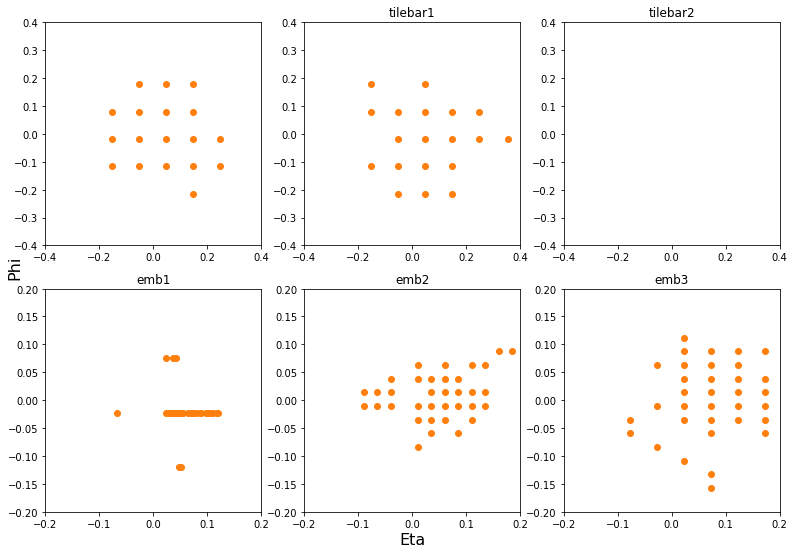

In [89]:
plt_2d = plt.figure(figsize=(12,8))
eta_bounds = (-.4,.4)
phi_bounds = (-.4,.4)

subp_height = v_space + v_fill
subp_width = h_space + h_fill

background = plt_2d.add_axes([.1,.1,.85,.85])
background.spines['right'].set_visible(False)
background.spines['top'].set_visible(False)
background.spines['left'].set_visible(False)
background.spines['bottom'].set_visible(False)
background.xaxis.set_ticks([])
background.xaxis.set_ticklabels([])
background.yaxis.set_ticks([])
background.yaxis.set_ticklabels([])
background.set_xlabel('Eta', fontsize=16, labelpad=20)
background.set_ylabel('Phi', fontsize=16, labelpad=23)

## EMB 1
lower_left = plt_2d.add_axes([h_points[0], v_points[0], h_fill, v_fill])
lower_left.set_title('emb1')
lower_left.scatter(Xraw[visual_event,emb1_em,1], Xraw[visual_event,emb1_em,2])
lower_left.scatter(Xraw[visual_event,emb1_mix,1], Xraw[visual_event,emb1_mix,2])
lower_left.scatter(Xraw[visual_event,emb1_nonem,1], Xraw[visual_event,emb1_nonem,2])
lower_left.set_xlim(-.2,.2)
lower_left.set_ylim(-.2,.2)

## EMB 2
lower_middle = plt_2d.add_axes([h_points[1], v_points[0], h_fill, v_fill])
lower_middle.set_title('emb2')
lower_middle.scatter(Xraw[visual_event,emb2_em,1], Xraw[visual_event,emb2_em,2])
lower_middle.scatter(Xraw[visual_event,emb2_mix,1], Xraw[visual_event,emb2_mix,2])
lower_middle.scatter(Xraw[visual_event,emb2_nonem,1], Xraw[visual_event,emb2_nonem,2])
lower_middle.set_xlim(-.2,.2)
lower_middle.set_ylim(-.2,.2)

## EMB 3
lower_right = plt_2d.add_axes([h_points[2], v_points[0], h_fill, v_fill])
lower_right.set_title('emb3')
lower_right.scatter(Xraw[visual_event,emb3_em,1], Xraw[visual_event,emb3_em,2])
lower_right.scatter(Xraw[visual_event,emb3_mix,1], Xraw[visual_event,emb3_mix,2])
lower_right.scatter(Xraw[visual_event,emb3_nonem,1], Xraw[visual_event,emb3_nonem,2])
lower_right.set_xlim(-.2,.2)
lower_right.set_ylim(-.2,.2)

## TileBar0
upper_left = plt_2d.add_axes([h_points[0], v_points[1], h_fill, v_fill])
upper_left.scatter(Xraw[visual_event,tilebar0_em,1], Xraw[visual_event,tilebar0_em,2])
upper_left.scatter(Xraw[visual_event,tilebar0_mix,1], Xraw[visual_event,tilebar0_mix,2])
upper_left.scatter(Xraw[visual_event,tilebar0_nonem,1], Xraw[visual_event,tilebar0_nonem,2])
upper_left.set_xlim(eta_bounds[0],eta_bounds[1])
upper_left.set_ylim(phi_bounds[0],phi_bounds[1])

## TileBar1
upper_middle = plt_2d.add_axes([h_points[1], v_points[1], h_fill, v_fill])
upper_middle.set_title('tilebar1')
upper_middle.scatter(Xraw[visual_event,tilebar1_em,1], Xraw[visual_event,tilebar1_em,2])
upper_middle.scatter(Xraw[visual_event,tilebar1_mix,1], Xraw[visual_event,tilebar1_mix,2])
upper_middle.scatter(Xraw[visual_event,tilebar1_nonem,1], Xraw[visual_event,tilebar1_nonem,2])
upper_middle.set_xlim(eta_bounds[0],eta_bounds[1])
upper_middle.set_ylim(phi_bounds[0],phi_bounds[1])

## TileBar2
upper_right = plt_2d.add_axes([h_points[2], v_points[1], h_fill, v_fill])
upper_right.set_title('tilebar2')
upper_right.scatter(Xraw[visual_event,tilebar2_em,1], Xraw[visual_event,tilebar2_em,2])
upper_right.scatter(Xraw[visual_event,tilebar2_mix,1], Xraw[visual_event,tilebar2_mix,2])
upper_right.scatter(Xraw[visual_event,tilebar2_nonem,1], Xraw[visual_event,tilebar2_nonem,2])
upper_right.set_xlim(eta_bounds[0],eta_bounds[1])
upper_right.set_ylim(phi_bounds[0],phi_bounds[1])

plt.show()

### Same thing but with colormapping to EM/nonEM ratio
c=np.log(EMB3_clust[:,6]), cmap=cm.viridis

[-0.13579711  0.0642029  -0.13579711 -0.33579713]
[ 0.06983972  0.06983972 -0.12650967  0.06983972]


<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:1159: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


<Figure size 432x288 with 0 Axes>

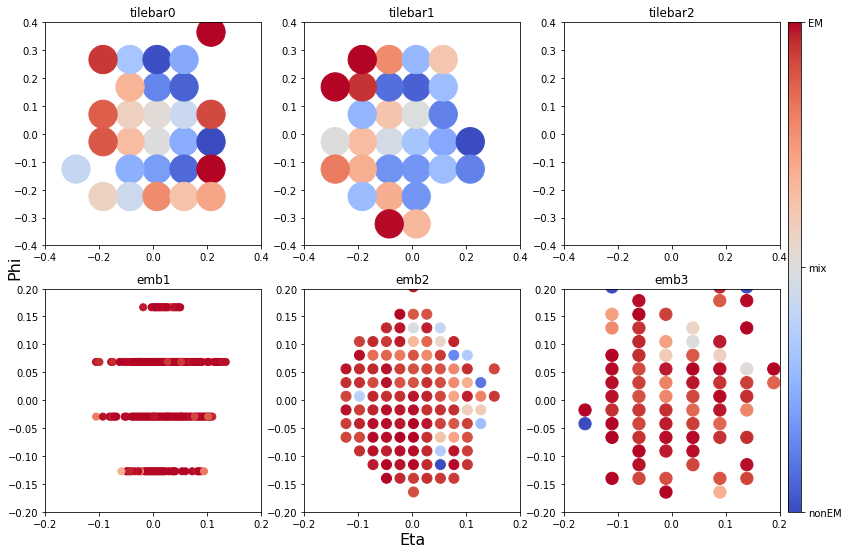

In [271]:
plt.cla();plt.clf()
plt_2d = plt.figure(figsize=(12,8))

subp_height = v_space + v_fill
subp_width = h_space + h_fill

background = plt_2d.add_axes([.1,.1,.85,.85])
background.spines['right'].set_visible(False)
background.spines['top'].set_visible(False)
background.spines['left'].set_visible(False)
background.spines['bottom'].set_visible(False)
background.xaxis.set_ticks([])
background.xaxis.set_ticklabels([])
background.yaxis.set_ticks([])
background.yaxis.set_ticklabels([])
background.set_xlabel('Eta', fontsize=16, labelpad=20)
background.set_ylabel('Phi', fontsize=16, labelpad=23)

## EMB 1
lower_left = plt_2d.add_axes([h_points[0], v_points[0], h_fill, v_fill])
lower_left.set_title('emb1')
emb1plt = lower_left.scatter(Xraw[visual_event,emb1_mask,1], Xraw[visual_event,emb1_mask,2],
                   c=Y_ratio[visual_event, emb1_mask,0], cmap=cm.coolwarm, s=50,
                            vmin=0,vmax=1.0)
lower_left.set_xlim(-.2,.2)
lower_left.set_ylim(-.2,.2)

## EMB 2
lower_middle = plt_2d.add_axes([h_points[1], v_points[0], h_fill, v_fill])
lower_middle.set_title('emb2')
lower_middle.scatter(Xraw[visual_event,emb2_mask,1], Xraw[visual_event,emb2_mask,2],
                     c=Y_ratio[visual_event, emb2_mask,0], cmap=cm.coolwarm, s=100)
lower_middle.set_xlim(-.2,.2)
lower_middle.set_ylim(-.2,.2)

## EMB 3
lower_right = plt_2d.add_axes([h_points[2], v_points[0], h_fill, v_fill])
lower_right.set_title('emb3')
lower_right.scatter(Xraw[visual_event,emb3_mask,1], Xraw[visual_event,emb3_mask,2],
                    c=Y_ratio[visual_event, emb3_mask,0], cmap=cm.coolwarm, s=150)
lower_right.set_xlim(-.2,.2)
lower_right.set_ylim(-.2,.2)

## TileBar0
upper_left = plt_2d.add_axes([h_points[0], v_points[1], h_fill, v_fill])
upper_left.set_title('tilebar0')
upper_left.scatter(Xraw[visual_event,tilebar0_mask,1], Xraw[visual_event,tilebar0_mask,2],
                   c=Y_ratio[visual_event, tilebar0_mask,0], cmap=cm.coolwarm, s=800)
upper_left.set_xlim(eta_bounds[0],eta_bounds[1])
upper_left.set_ylim(phi_bounds[0],phi_bounds[1])

## TileBar1
upper_middle = plt_2d.add_axes([h_points[1], v_points[1], h_fill, v_fill])
upper_middle.set_title('tilebar1')
upper_middle.scatter(Xraw[visual_event,tilebar1_mask,1], Xraw[visual_event,tilebar1_mask,2],
                     c=Y_ratio[visual_event, tilebar1_mask,0], cmap=cm.coolwarm, s=800)
upper_middle.set_xlim(eta_bounds[0],eta_bounds[1])
upper_middle.set_ylim(phi_bounds[0],phi_bounds[1])

## TileBar2
upper_right = plt_2d.add_axes([h_points[2], v_points[1], h_fill, v_fill])
upper_right.set_title('tilebar2')
upper_right.scatter(Xraw[visual_event,tilebar2_mask,1], Xraw[visual_event,tilebar2_mask,2],
                    c=Y_ratio[visual_event, tilebar2_mask,0], cmap=cm.coolwarm, s=800)
upper_right.set_xlim(-.4,.4)
upper_right.set_ylim(-.4,.4)

print(Xraw[visual_event,tilebar2_mask,1])
print(Xraw[visual_event,tilebar2_mask,2])

## COLORBAR ##
cb_ax = plt_2d.add_axes([.96, 0.1, 0.015, 0.85])
cbar = plt_2d.colorbar(emb1plt, cax=cb_ax)

# set the colorbar ticks and tick labels
cbar.set_ticks(np.arange(-.5, 1.1, 0.5))
cbar.set_ticklabels(['filler', 'nonEM', 'mix', 'EM'])

plt.savefig('/home/russbate/MLPionCollaboration/LCStudies/visualization/Plots/'\
            +'October21/six_panel_colormap_'+str(visual_event)+'.png', format='png')

plt.show()

## Experiment with imshow
#### TO DO:
- [ ] Flip to correct axis with imshow!
- [ ] Move functions to python script
- [ ] Handle divide by zero exceptions in script

#### Function to convert scatterplot data into an array

In [272]:
def create_image(cell_size_eta, cell_size_phi, nEta, nPhi, layer_eta, layer_phi, layer_E, mask,
                 eta_shift=0, phi_shift=0, logscale=True):
    ''' Takes layer and cluster information to produce a pixel image using binning.
    Inputs: 
        cell_size_eta/phi: size of each calo cell for that layer
        nEta/nPhi: discrete number of points which to include
        later_eta/phi/E: the input values of the cluster
        mask: which values to choose from
        eta/phi_shift: artificially move the cluster in the eta phi plane
        logscale: whether or not to take the log of the energy values
    Outputs:
        (n,m) array with energy values filled in the appropriate bins, otherwise np.nan
    '''
    
    eta_span = cell_size_eta * nEta
    phi_span = cell_size_phi * nPhi
    eta_start = - int(nEta/2) * cell_size_eta
    phi_start = - int(nPhi/2) * cell_size_phi
    
    # fill with np.nan so hopefully imshow wont plot this?
    image = np.full((nEta, nPhi), np.nan)
    point_out = 0
    
    for i in range(np.count_nonzero(mask)):
        
        N = int(np.floor( ( (layer_eta[i] - eta_start)/eta_span) * nEta ))
        M = int(np.floor( ( (layer_phi[i] - phi_start)/phi_span) * nPhi ))
        
        inbounds = True
        if N < 0 or M < 0:
            inbounds = False
        if N >= nEta or M >= nPhi:
            inbounds = False
            
        if inbounds == True:
            if logscale:
                image[N,M] = np.log(layer_E[i])
            else:
                image[N,M] = layer_E[i]
        else:
            point_out += 1
            
    print(str(point_out)+' points out of bounds')
    return image

EMB1
Eta: -0.1984, 0.1984
Phi: -0.196, 0.196
4 points out of bounds
EMB2
Eta: -0.2, 0.2
Phi: -0.196, 0.196
1 points out of bounds
EMB3
Eta: -0.2, 0.2
Phi: -0.196, 0.196
11 points out of bounds
TileBar0
Eta: -0.4, 0.4
Phi: -0.4, 0.4
0 points out of bounds
TileBar1
Eta: -0.4, 0.4
Phi: -0.4, 0.4
0 points out of bounds
TileBar2
Eta: -0.4, 0.4
Phi: -0.4, 0.4
0 points out of bounds


<Figure size 432x288 with 0 Axes>

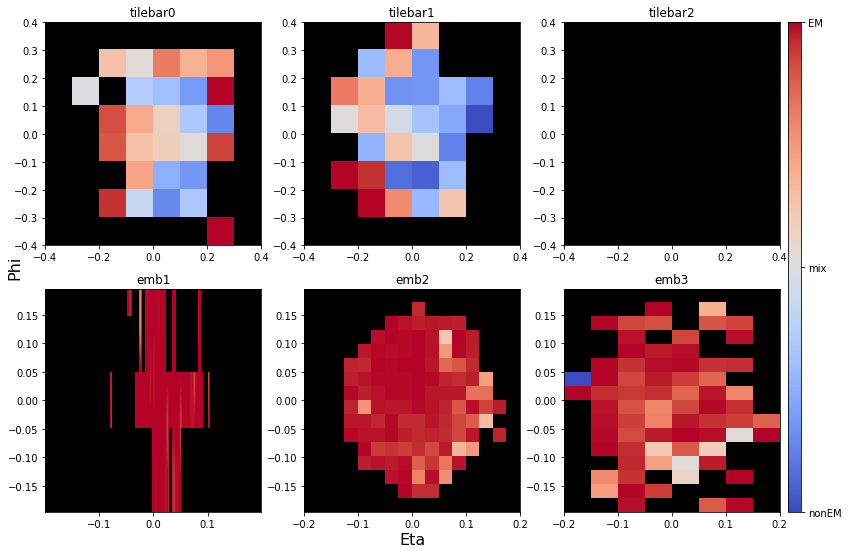

In [273]:
plt.cla();plt.clf()
plt_2d = plt.figure(figsize=(12,8))

subp_height = v_space + v_fill
subp_width = h_space + h_fill

background = plt_2d.add_axes([.1,.1,.85,.85])
background.spines['right'].set_visible(False)
background.spines['top'].set_visible(False)
background.spines['left'].set_visible(False)
background.spines['bottom'].set_visible(False)
background.xaxis.set_ticks([])
background.xaxis.set_ticklabels([])
background.yaxis.set_ticks([])
background.yaxis.set_ticklabels([])
background.set_xlabel('Eta', fontsize=16, labelpad=20)
background.set_ylabel('Phi', fontsize=16, labelpad=23)

## SET COLORMAP
current_cmap = plt.cm.get_cmap('coolwarm').copy()
current_cmap.set_bad(color='black')

## EMB 1
lower_left = plt_2d.add_axes([h_points[0], v_points[0], h_fill, v_fill])
lower_left.set_title('emb1')
emb1_cell_mask = np.logical_and(cell_mask[visual_event,:], emb1_mask)

emb1_cell_size_eta = cell_meta['EMB1']['cell_size_eta']
emb1_cell_size_phi = cell_meta['EMB1']['cell_size_phi']
emb1_nEta, emb1_nPhi = 128, 4
emb1_eta_span = emb1_cell_size_eta * emb1_nEta
emb1_phi_span = emb1_cell_size_phi * emb1_nPhi
emb1_eta_start = - int(emb1_nEta/2) * emb1_cell_size_eta
emb1_phi_start = - int(emb1_nPhi/2) * emb1_cell_size_phi
emb1_eta_end = emb1_eta_start + emb1_eta_span
emb1_phi_end = emb1_phi_start + emb1_phi_span
print('EMB1')
print('Eta: '+str(emb1_eta_start)+', '+str(emb1_eta_end))
print('Phi: '+str(emb1_phi_start)+', '+str(emb1_phi_end))

emb1_image = create_image(cell_size_eta=emb1_cell_size_eta,
                         cell_size_phi=emb1_cell_size_phi,
                         nEta=emb1_nEta, nPhi=emb1_nPhi,
                         layer_eta=Xraw[visual_event,emb1_mask,1],
                         layer_phi=Xraw[visual_event,emb1_mask,2],
                         layer_E=Y_ratio[visual_event,emb1_mask,0],
                         mask=emb1_cell_mask, logscale=False)
emb1plt = lower_left.imshow(emb1_image.transpose(), cmap=current_cmap,
                            vmin=0, vmax=1.0, aspect='auto',
                            extent=[emb1_eta_start, emb1_eta_end,
                                   emb1_phi_start, emb1_phi_end])


## EMB 2
lower_middle = plt_2d.add_axes([h_points[1], v_points[0], h_fill, v_fill])
lower_middle.set_title('emb2')
emb2_cell_mask = np.logical_and(cell_mask[visual_event,:], emb2_mask)

emb2_cell_size_eta = cell_meta['EMB2']['cell_size_eta']
emb2_cell_size_phi = cell_meta['EMB2']['cell_size_phi']
emb2_nEta, emb2_nPhi = 16, 16
emb2_eta_span = emb2_cell_size_eta * emb2_nEta
emb2_phi_span = emb2_cell_size_phi * emb2_nPhi
emb2_eta_start = - int(emb2_nEta/2) * emb2_cell_size_eta
emb2_phi_start = - int(emb2_nPhi/2) * emb2_cell_size_phi
emb2_eta_end = emb2_eta_start + emb2_eta_span
emb2_phi_end = emb2_phi_start + emb2_phi_span
print('EMB2')
print('Eta: '+str(emb2_eta_start)+', '+str(emb2_eta_end))
print('Phi: '+str(emb2_phi_start)+', '+str(emb2_phi_end))

emb2_image = create_image(cell_size_eta=cell_meta['EMB2']['cell_size_eta'],
                         cell_size_phi=cell_meta['EMB2']['cell_size_phi'],
                         nEta=emb2_nEta, nPhi=emb2_nEta,
                         layer_eta=Xraw[visual_event,emb2_mask,1],
                         layer_phi=Xraw[visual_event,emb2_mask,2],
                         layer_E=Y_ratio[visual_event,emb2_mask,0],
                         mask=emb2_cell_mask, logscale=False)
emb2plt = lower_middle.imshow(emb2_image.transpose(), cmap=current_cmap,
                            vmin=0, vmax=1.0, aspect='auto',
                            extent=[emb2_eta_start, emb2_eta_end,
                                   emb2_phi_start, emb2_phi_end])

## EMB 3
lower_right = plt_2d.add_axes([h_points[2], v_points[0], h_fill, v_fill])
lower_right.set_title('emb3')
emb3_cell_mask = np.logical_and(cell_mask[visual_event,:], emb3_mask)

emb3_cell_size_eta = cell_meta['EMB3']['cell_size_eta']
emb3_cell_size_phi = cell_meta['EMB3']['cell_size_phi']
emb3_nEta, emb3_nPhi = 8, 16
emb3_eta_span = emb3_cell_size_eta * emb3_nEta
emb3_phi_span = emb3_cell_size_phi * emb3_nPhi
emb3_eta_start = - int(emb3_nEta/2) * emb3_cell_size_eta
emb3_phi_start = - int(emb3_nPhi/2) * emb3_cell_size_phi
emb3_eta_end = emb3_eta_start + emb3_eta_span
emb3_phi_end = emb3_phi_start + emb3_phi_span
print('EMB3')
print('Eta: '+str(emb3_eta_start)+', '+str(emb3_eta_end))
print('Phi: '+str(emb3_phi_start)+', '+str(emb3_phi_end))

emb3_image = create_image(cell_size_eta=cell_meta['EMB3']['cell_size_eta'],
                         cell_size_phi=cell_meta['EMB3']['cell_size_phi'],
                         nEta=emb3_nEta, nPhi=emb3_nPhi,
                         layer_eta=Xraw[visual_event,emb3_mask,1],
                         layer_phi=Xraw[visual_event,emb3_mask,2],
                         layer_E=Y_ratio[visual_event,emb3_mask,0],
                         mask=emb3_cell_mask, logscale=False)
emb3plt = lower_right.imshow(emb3_image.transpose(), cmap=current_cmap,
                            vmin=0, vmax=1.0, aspect='auto',
                            extent=[emb3_eta_start, emb3_eta_end,
                                   emb3_phi_start, emb3_phi_end])

## TileBar0
upper_left = plt_2d.add_axes([h_points[0], v_points[1], h_fill, v_fill])
upper_left.set_title('tilebar0')
tile0_cell_mask = np.logical_and(cell_mask[visual_event,:], tilebar0_mask)

tilebar0_cell_size_eta = cell_meta['TileBar0']['cell_size_eta']
tilebar0_cell_size_phi = cell_meta['TileBar0']['cell_size_phi']
tilebar0_nEta, tilebar0_nPhi = 8, 8
tilebar0_eta_span = tilebar0_cell_size_eta * tilebar0_nEta
tilebar0_phi_span = tilebar0_cell_size_phi * tilebar0_nPhi
tilebar0_eta_start = - int(tilebar0_nEta/2) * tilebar0_cell_size_eta
tilebar0_phi_start = - int(tilebar0_nPhi/2) * tilebar0_cell_size_phi
tilebar0_eta_end = tilebar0_eta_start + tilebar0_eta_span
tilebar0_phi_end = tilebar0_phi_start + tilebar0_phi_span
print('TileBar0')
print('Eta: '+str(tilebar0_eta_start)+', '+str(tilebar0_eta_end))
print('Phi: '+str(tilebar0_phi_start)+', '+str(tilebar0_phi_end))

tile0_image = create_image(cell_size_eta=cell_meta['TileBar0']['cell_size_eta'],
                         cell_size_phi=cell_meta['TileBar0']['cell_size_phi'],
                         nEta=tilebar0_nEta, nPhi=tilebar0_nPhi,
                         layer_eta=Xraw[visual_event,tilebar0_mask,1],
                         layer_phi=Xraw[visual_event,tilebar0_mask,2],
                         layer_E=Y_ratio[visual_event,tilebar0_mask,0],
                         mask=tile0_cell_mask, logscale=False)
tile0plt = upper_left.imshow(tile0_image.transpose(), cmap=current_cmap,
                            vmin=0, vmax=1.0, aspect='auto',
                            extent=[tilebar0_eta_start, tilebar0_eta_end,
                                   tilebar0_phi_start, tilebar0_phi_end])

## TileBar1
upper_middle = plt_2d.add_axes([h_points[1], v_points[1], h_fill, v_fill])
upper_middle.set_title('tilebar1')
tile1_cell_mask = np.logical_and(cell_mask[visual_event,:], tilebar1_mask)

tilebar1_cell_size_eta = cell_meta['TileBar1']['cell_size_eta']
tilebar1_cell_size_phi = cell_meta['TileBar1']['cell_size_phi']
tilebar1_nEta, tilebar1_nPhi = 8, 8
tilebar1_eta_span = tilebar1_cell_size_eta * tilebar1_nEta
tilebar1_phi_span = tilebar1_cell_size_phi * tilebar1_nPhi
tilebar1_eta_start = - int(tilebar1_nEta/2) * tilebar1_cell_size_eta
tilebar1_phi_start = - int(tilebar1_nPhi/2) * tilebar1_cell_size_phi
tilebar1_eta_end = tilebar1_eta_start + tilebar1_eta_span
tilebar1_phi_end = tilebar1_phi_start + tilebar1_phi_span
print('TileBar1')
print('Eta: '+str(tilebar1_eta_start)+', '+str(tilebar1_eta_end))
print('Phi: '+str(tilebar1_phi_start)+', '+str(tilebar1_phi_end))

tile1_image = create_image(cell_size_eta=cell_meta['TileBar1']['cell_size_eta'],
                         cell_size_phi=cell_meta['TileBar1']['cell_size_phi'],
                         nEta=tilebar1_nEta, nPhi=tilebar1_nPhi,
                         layer_eta=Xraw[visual_event,tilebar1_mask,1],
                         layer_phi=Xraw[visual_event,tilebar1_mask,2],
                         layer_E=Y_ratio[visual_event,tilebar1_mask,0],
                         mask=tile1_cell_mask, logscale=False)
tile1plt = upper_middle.imshow(tile1_image.transpose(), cmap=current_cmap,
                            vmin=0, vmax=1.0, aspect='auto',
                            extent=[tilebar1_eta_start, tilebar1_eta_end,
                                   tilebar1_phi_start, tilebar1_phi_end])

## TileBar2
upper_right = plt_2d.add_axes([h_points[2], v_points[1], h_fill, v_fill])
upper_right.set_title('tilebar2')
tile2_cell_mask = np.logical_and(cell_mask[visual_event,:], tilebar2_mask)

tilebar2_cell_size_eta = cell_meta['TileBar2']['cell_size_eta']
tilebar2_cell_size_phi = cell_meta['TileBar2']['cell_size_phi']
tilebar2_nEta, tilebar2_nPhi = 4, 8
tilebar2_eta_span = tilebar2_cell_size_eta * tilebar2_nEta
tilebar2_phi_span = tilebar2_cell_size_phi * tilebar2_nPhi
tilebar2_eta_start = - int(tilebar2_nEta/2) * tilebar2_cell_size_eta
tilebar2_phi_start = - int(tilebar2_nPhi/2) * tilebar2_cell_size_phi
tilebar2_eta_end = tilebar2_eta_start + tilebar2_eta_span
tilebar2_phi_end = tilebar2_phi_start + tilebar2_phi_span
print('TileBar2')
print('Eta: '+str(tilebar2_eta_start)+', '+str(tilebar2_eta_end))
print('Phi: '+str(tilebar2_phi_start)+', '+str(tilebar2_phi_end))

tile2_image = create_image(cell_size_eta=cell_meta['TileBar2']['cell_size_eta'],
                         cell_size_phi=cell_meta['TileBar2']['cell_size_phi'],
                         nEta=tilebar2_nEta, nPhi=tilebar2_nPhi,
                         layer_eta=Xraw[visual_event,tilebar2_mask,1],
                         layer_phi=Xraw[visual_event,tilebar2_mask,2],
                         layer_E=Y_ratio[visual_event,tilebar2_mask,0],
                         mask=tile2_cell_mask, logscale=False)
tile2plt = upper_right.imshow(tile2_image.transpose(), cmap=current_cmap,
                            vmin=0, vmax=1.0, aspect='auto',
                            extent=[tilebar2_eta_start, tilebar2_eta_end,
                                   tilebar2_phi_start, tilebar2_phi_end])

## COLORBAR ##
cb_ax = plt_2d.add_axes([.96, 0.1, 0.015, 0.85])
cbar = plt_2d.colorbar(emb1plt, cax=cb_ax)

# set the colorbar ticks and tick labels
cbar.set_ticks(np.arange(-.5, 1.1, 0.5))
cbar.set_ticklabels(['filler', 'nonEM', 'mix', 'EM'])

# plt.savefig('/home/russbate/MLPionCollaboration/LCStudies/visualization/Plots/'\
#             +'October21/six_panel_imshow_'+str(visual_event)+'.png', format='png')

plt.show()